# Notes about this lecture
Because of the Corona virus outbreak, this lecture will not be held in the classroom but online only. Further, the lecture will only be available in this written form. In order to offer support for the students we will use the gitlab issue tracker as a question & answer forum: https://git.ee.ethz.ch/python-for-engineers/class-fs20-forum and individual videoconference sessions when needed.

## Software

### Necessary software
Please install the following tools:
* python3 (https://www.python.org/downloads/ version 3.8.2 is fine.
Python is a prerequisite for jupyter)
* jupyter-notebook (https://jupyter.org/install.html)
* **Hint for Windows and OSX**: Try to install conda or miniconda (https://docs.conda.io/en/latest/miniconda.html) first. This will install Python and jupyter-notebook automatically.

### Optional (but highly recommended) software
* git (https://git-scm.com/download/). Git is harder to install but not strictly necessary. **Hint**: On Windows Git will automatically install a Linux compatible shell which can then be found as 'Git BASH'.
* If git is not available, solutions shall be uploaded on https://polybox.ethz.ch instead and the folder shall be shared with the lecturers. 

## Support
**For any issues please use the forum** at: https://git.ee.ethz.ch/python-for-engineers/class-fs20-forum and follow the instructions therein. In case of need, we will open a room on https://jitsi.riot.im/ and share the audio, video or the screen: make sure you have a microphone and speakers functioning. 

This service is offered only **during the normal lecture hours**.

# Obtaining the material for this lecture
### If git is available on your system (preferred option)
Pull the new material from the upstream repository:

```bash
cd class-fs20
git pull upstream master
```

Then launch the jupyter-notebook and open the Lecture_XX file:

```bash
anaconda # Only on ETH computers to load the Python environment.
jupyter-notebook &
```

### If git is **not** available on your system
Download the latest material from:
https://git.ee.ethz.ch/python-for-engineers/class-fs20/-/archive/master/class-fs20-master.zip
and unpack it on your computer.

# Summary of previous lecture

Please open the jupyter-notebook of the past lecture and read through it. This will help fixing the learned notions into the long-term memory.

The following part on *Scipy* builds up on *Numpy*. Therefore it is highly recommended to refresh the *Numpy* lecture.

### ✏️ $\mu$-exercise

After having refreshed the last lecture, please switch to the Exercise notebook and complete $\mu$-exercise **0**.

# Matplotlib
"[Matplotlib](https://matplotlib.org/index.html) is a comprehensive library for creating static, animated, and interactive visualizations in Python." The capabilities of Matplotlib are so broad that in this lecture we will only be able to cover the very basics, namely plotting of one-dimensional data using the `pyplot` module.

There is a myriad of different plot types and formatting options available. A good way to find code examples for specific needs is to look at the example [gallery](https://matplotlib.org/gallery.html), which provides example pictures together with their code.

In the following example two one-dimensional data sets are plotted into the same XY plot.

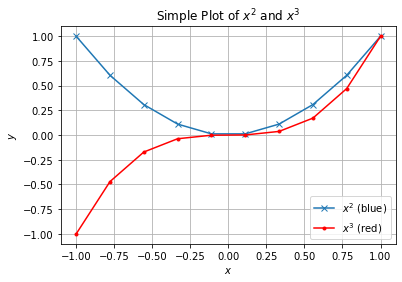

In [1]:
# Notice that matplotlib is not necessarily installed by default.
# Possibly it has to be installed with `pip install matplotlib`.
import matplotlib.pyplot as plt

import numpy as np

# Create x values of the curves.
x = np.linspace(-1, 1, num=10)

# Create y values of the curves.
y1 = x**2
y2 = x**3

# Plot the two curves.
# There are many settings available. Among the most important are
# * label: The text to be shown in the legend.
# * marker: Symbol to be used to mark the data points.
# * color: Color of the curve.
# Notice: Text between `$$` is treated as Latex code.
plt.plot(x, y1, label="$x^2$ (blue)", marker='x')
plt.plot(x, y2, label="$x^3$ (red)", color='red', marker='.')

# Set axis labels.
plt.xlabel("$x$")
plt.ylabel("$y$")

# Set plot title.
plt.title("Simple Plot of $x^2$ and $x^3$")

# Enable the legend.
plt.legend()

# Enable the grid.
plt.grid(True)

# Show the plot.
plt.show()

# Hint: If you don't see an image run the code a second time.

Notice that the picture of the plot is directly embedded in the Jupyter notebook. It is also possible to create plots from Python script files. For this see the $\mu$-exercise!

### ✏️ $\mu$-exercise 1, 2 and 3

# Scipy - Scientific Python

"[SciPy](https://www.scipy.org/) (pronounced ˈsaɪpaɪ') is a Python-based ecosystem of open-source software for mathematics, science, and engineering." Numpy and Matplotlib belong to this ecosystem while the n-dimensional arrays of Numpy form the foundation of most parts of Scipy. The *Scipy library* as it will be introduced here "provides many user-friendly and efficient numerical routines, such as routines for numerical integration, interpolation, optimization, linear algebra, and statistics". Also basic signal processing (fast fourier transform FFT) and solving of ordinary differential equations will be covered here.

## Optimization - `scipy.optimize`
The [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html) package contains many functions for numerical optimization (finding local or global extrema) and for numerical *root finding* (solving equations).

The following example shows how `sicpy.optimize` can be used to find a local minimum of a scalar function:

In [3]:
from scipy import optimize

def f(x):
    """
    Define the function to be used as optimization objective.
    """
    print("Evaluate f at ", x)
    return (x-1)**2

# Find a local minimum of a function with a single parameter.
# This should find the minimum at x = 1.
result = optimize.minimize_scalar(f)

print('Success of optimiztion: ', result.success)
print('Number of optimization iterations:', result.nit)
print('Number of functions evaluations (of f):', result.nfev)
print('Result: x = ', result.x)
print('Result: f(x) = ', result.fun)

Evaluate f at  0.0
Evaluate f at  1.0
Evaluate f at  2.6180339999999998
Evaluate f at  1.0
Evaluate f at  1.6180339748439998
Evaluate f at  0.618034
Evaluate f at  1.00000001481
Evaluate f at  0.99999998519
Success of optimiztion:  True
Number of optimization iterations: 4
Number of functions evaluations (of f): 8
Result: x =  1.0
Result: f(x) =  0.0


Because `minimize_scalar` finds *local* minima in some cases it is necessary to specify in which region to search for the minima. For example a cosine has many local minima:

In [ ]:
from scipy import optimize
import numpy as np

def f(x):
    """
    Define the function to be used as optimization objective.
    """
    # This has *many* local minima.
    return np.cos(x)

# Find a local minimum of a function with a single parameter.
# With `method='bounded'` bounds for `x` can be given. In this case
# this allows to specify which of the many local minima we are interested in.
result = optimize.minimize_scalar(f, method='bounded', bounds=[-4, 0])

print('Result =', result.x)

# Notice that here the result is not perfect.
# There is a numerical error. The error could
# be controlled with the `tol` tolerance parameter.

print('Numerical error =', result.x - (-np.pi))

### Finding local minima of functions with multiple arguments
The examples above only optimized functions with a single argument. The `minimize` function is more general and supports finding minima for functions with multiple arguments. Notice that *multiple arguments* here means that the argument is a vector (`np.ndarray`).

In [ ]:
from scipy import optimize
import numpy as np

# Find local minimum of a multi-variate function.

def f(x: np.ndarray): # This syntax is called a 'type hint'.
    
    # The two variables are encoded in a ndarray.
    return (x[0]-1)**2 + (x[1]-2)**2

# An initial guess must be provided.
# The guess should be somewhere close to the minimum we want to find.
initial_guess = [1, 0]
result = optimize.minimize(f, x0=initial_guess)

print(result)

### Solving equations numerically
The `scipy.optimize` method also provides methods for *root finding* to solve equations numerically. This method finds for a given a function $f$ the arguments $x$ such that $f(x) = 0 + error$. Where the $error$ should be very small.

In the following examle *root finding* is used on the function $\exp(x) = 2$.

In [ ]:
import scipy.optimize

def f(x):
    """
    This is the function of which we want to find the root (f(x) = 0).
    """
    # exp(x) = 2
    # becomes
    # exp(x) - 2 = 0
    return np.exp(x) - 2 # = 0

# Solve the equation numerically.
# An initial guess x0 has to be provided which should be 
# sufficiently close to the solution.
result = scipy.optimize.root(f, x0=0)

# Compute expected solution.
expected_solution = np.log(2)
print(f"success = {result.success}")

if result.success:
    print(f"x = {result.x}")
    print(f"f(x) = {f(result.x)}")
    error = np.abs(result.x - expected_solution)
    print(f"numerical error = {error}")

There are many different algorithms available to numerically solve equations. More information on them can be found here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html.

Notice that $f$ can be a vector function.

## Curve fitting with `scipy.optimize` 

A common application of optimization methods is *curve fitting*, i.e. finding parameters of a function based on known measurement values.

The following example shows how the parameters of a parabola can be found such that the parabola lies close to pre-defined points. The function [`curve_fit()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) effectively finds parameters for a function that minimize the quadratic error between the function and the measurement points.

The following shows how to use `curve_fit` to fit function parameters based on noisy measurement data.

In [ ]:
import scipy
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

# Noisy measurement data.
xdata = np.array([1, 3, 3, 7, 5, 2, 6, 5])
ydata = np.array([3.4, 5.1, 4.2, 0.9, 4.7, 4.1, 2.5, 4.0])

def f(x, a, b, c):
    """
    Function to be fitted.
    """
    return a*x**2 + b*x + c

# Find parameters that minimize the squared error
# between the fitted curve and the measurements.
popt, pcov = scipy.optimize.curve_fit(f, xdata, ydata)

print("Fitted parameters a, b, c = ", popt)

# Plot the fitted curve.
x = np.linspace(0, 8, 100)
y = f(x, *popt)
plt.plot(x, y, label='Fitted curve')

# Plot the measurements
plt.scatter(xdata, ydata, marker='x', label='Measurement points')
plt.xlabel('$x$')
plt.ylabel('$y = f(x)$')
plt.legend()

## Numerical integration - `scipy.integrate`

Scipy provides functions for numerical integration or *quadrature*.

    Wikipedia: "In mathematics, *quadrature* is a historical term which means the process of determining area."
    
For example the function `quad` can be used to compute definite integrals numerically as shown in the following.

In [ ]:
import scipy.integrate

def f(x):
    # Define the function to be integrated.
    # Here we also know the analytical solution 
    # which allows us to verify the numerical solution.
    return x

# Compute the definite integral (or 'quadrature') of f.
# Define start and end of the integral.
a, b = 0, 1
quadrature, error = scipy.integrate.quad(f, a, b)

analytical_quadrature = 1/2*b**2 - 1/2*a**2
print(f"Analytical integral of f from {a} to {b} is: {analytical_quadrature}")
print(f"Numerical integral of f from {a} to {b} is: {quadrature}")
print(f"The absolute error is: {error}")


## Solving ordinary differential equations (ODEs) - Initial value problem
Solving ODEs is tightly related with numerical integration. The following example will show how to numerically solve an *initial value problem* with Scipy.

(An *initial value problem* consists of a differential equation wich describes the rate of change of the *state* variables. Additionally the *initial* state is known.  Solving this problem means to determine the state of the variables depending on time.)

The function [`scipy.integrate.solve_ivp`](
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) (*IVP* = Initial Value Problem) can be used to find a numerical solution for `y` such that the following holds within some small error:
```
dy / dt = f(t, y)
y(t0) = y0
```
The state variable `y` can be a single number as well as a *state vector*.

The following example shows how the differential equation $ \dot{y} = -y ~ $ with $ ~ y(0) = 1 $ can be solved numerically.

Text(0, 0.5, '$y(t)$')

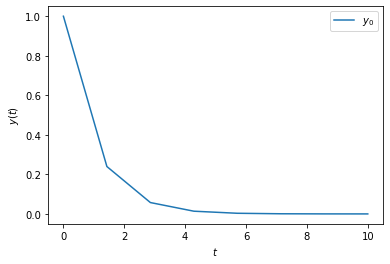

In [4]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

def exponential_decay(t, y):
    """
    Define the derivative of y at time t.
    """
    # dy/dt = -y
    return -y

# Set the initial values of of the state variable y.
y0 = [1]

t_start = 0
t_end = 10

# Optionally define at which values of t the solution should be returned.
# The accuracy of the solution is not affected by the choice of `t_eval`.
num_output_samples = 8 # Enlarge this for a smoother plot.
t_eval = np.linspace(t_start, t_end, num_output_samples)

# Solve the ODE.
sol = scipy.integrate.solve_ivp(exponential_decay, [t_start, t_end], y0, 
                                t_eval=t_eval # This is optional
                               )

# Plot the results.
import matplotlib.pyplot as plt

# Plot each component of y. (y is a vector).
for i, y in enumerate(sol.y):
    plt.plot(sol.t, y, label=f'$y_{i}$')

# Format the plot.
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$y(t)$')

## Solving differential equations of higher order

Differential equations with more than one state variable can be solved as shown in the following example.

A linear inhomogenous differential equation of degree 2 shall be considered:

$$ \ddot{x} + a \dot{x} + bx = u(t) $$

Physcially this could describe the behaviour of a damped harmonic oscillator where $x$ corresponds to the amplitude.
The `solve_ivp()` function does not directly support solving differential equations of second order. Therefore the equation has to be reformulated into a differential equation of first order using a state vector with two elements.

The equation above should be brought into the following form where $ \mathbf{y} $ is the *state vector* (vectors are marked in bold font):

$$ \dot{\mathbf{y}} = f(t, \mathbf{y}) $$

First we isolate $\ddot{x}$ on the left side:

$$ \ddot{x} = - a \dot{x} - bx + u(t) $$

Now we define the *state vector* as:

$$ \mathbf{y} = (y_1, y_2) = (x, \dot{x}) $$

And hence:

$$ \dot{\mathbf{y}} = (\dot{x}, \ddot{x}) $$

Because $x = y_1$, $\dot{x} = y_2$ and $\ddot{x} = - a \dot{x} - bx + u(t)$ we can write:

$$ \dot{\mathbf{y}} = (y_2, - a y_2 - b y_1 + u(t)) $$

which now has the required form and can be directly translated into a Python function as shown in the example below.

In [ ]:
import scipy.integrate
import matplotlib.pyplot as plt

def u(t):
    """
    In this example this is a step function.
    """
    if 10 < t:
        return 1
    else:
        return 0

def damped_harmonic_oscillator(t, y):
    """
    Define the derivative of y at time t.
    This is the `f(t, y)`.
    """
    
    # Constants.
    a, b = 0.2, 1
    
    # Unpack the state vector for easier accessing of the elements.
    y1, y2 = y
    
    # Compute derivative of the state vector as derived above.
    dy_dt = [
        y2,
        -a*y2 - b*y1 + u(t)
    ]
    return dy_dt

# Set the initial values of of the state variable y.
y0 = [0, 0]

# Define start and end time of the solution.
t_start = 0
t_end = 40

# Optionally define at which values of t the solution should be returned.
# The accuracy of the solution is not affected by the choice of `t_eval`.
num_output_samples = 100 # Enlarge this for a smoother plot.
t_eval = np.linspace(t_start, t_end, num_output_samples)

# Solve the ODE.
# Find a solution to `dy/dt = f(t, y)`.
sol = scipy.integrate.solve_ivp(damped_harmonic_oscillator, [t_start, t_end], y0, 
                                t_eval=t_eval # This is optional
                               )

# Plot the results.

# Plot each component of y. (y is a vector).

plt.plot(sol.t, sol.y[0], label='$y_1 = x(t)$')
plt.plot(sol.t, sol.y[1], label='$y_2 = \dot{x}(t)$')

# Plot u(t).
plt.plot(sol.t, np.vectorize(u)(sol.t), label="$u(t)$")

# Format the plot.
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$y(t)$')

## Signal processing - `numpy.fft` and `scipy.signal`
Scipy offers a wide range of functions for signal processing such as filtering. In the following only an example of the FFT is shown even though `scipy.signal` comes with many functions for signal processing including for example convolutions and filters such as FIR (finite impulse response) and IIR (infinite impulse response) filters together with methods to compute the filter coefficients. For more information see [`scipy.fft`](https://docs.scipy.org/doc/scipy/reference/fft.html), [`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html).

In [ ]:
from numpy.fft import rfft # Scipy relies on FFT in Numpy.

sample_rate = 100
t = np.arange(0, 1, step=1/sample_rate)

# Create a signal as the sum of two cosine oscillations.

# Frequencies of the oscillations.
f1 = 10
f2 = 20

# Create the two oscillating signals.
y1 = np.cos(2*np.pi*f1*t)
y2 = np.cos(2*np.pi*f2*t)

# Add the signals.
y = y1 + y2

plt.title("Signal in time domain")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.plot(t, y, '--.')
plt.show()

# Calculate the FFT of the signal.
# `rfft` can be used if the input signal is real.
# For complex signals `fft` should be used.
fft_data = rfft(y)

# Plot the squared absolute of the FFT.
# This will show two peaks at 10 and 20 corresponding to the two cosines.
plt.plot(np.abs(fft_data)**2, '--.')

plt.title("Signal in frequency domain")
plt.xlabel("f")
plt.ylabel("Amplitude")

plt.show()

# Exercises
Please solve the rest of the exercises.

# Uploading solutions
Before the end of the class at about 16:00, please "push" your solutions. 

Please do so even if you have not solved all problems: additional
uploads can be made in the following days. Instructions are below.

### If git is available on your system (preferred option)
Add, commit and push your changes to the remote server:

`git add -A`

`git commit -m 'My solutions to Lecture XX'`

`git push origin master`

### If git is **not** available on your system
This is **not** the favourite solution and it should be avoided whenever possible.

Upload your Lecture_XX folder (containing the Exercise file) to the polybox https://polybox.ethz.ch and share the folder with luca.alloatti@ief.ee.ethz.ch, thomas.kramer@ief.ee.ethz.ch, and raphael.schwanninger@ief.ee.ethz.ch . To share the folder go on https://polybox.ethz.ch , then on the right of the folder there is a graph with one vertex connecting to two other vertices: click on it and then type the three emails.